In [1]:
# https://medium.com/featurepreneur/colour-filtering-and-colour-pop-effects-using-opencv-python-3ce7d4576140
# https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html
# https://stackoverflow.com/questions/71404307/how-to-reduce-the-width-of-lines-in-black-and-white-images-and-make-them-thinner

#import the libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Sidford
# https://eastdevon.gov.uk/media/560967/sidfordcaa.pdf

#read the image
DIR = "C:\\Users\\DavidBrown\\Documents\\GIS\\"
fileName = "Sidbury_01.png"
#img               = cv.imread(DIR + "Screenshot 2024-07-09 143421.png")
#img               = cv.imread(DIR + "Salcombe Regis.jpg")
img               = cv.imread(DIR + fileName)



In [2]:
# Extract edges from the preprocessed image by converting it to grayscale, applying Gaussian blur, 
# and using the Canny edge detection algorithm. Find contours in the edge image, draw contours on 
# a blank image, and perform dilation and erosion operations to refine the contour image
def extract_edges(image):
    #grayscale_image = cv.GaussianBlur(
    #    cv.cvtColor(image, cv.COLOR_BGR2GRAY), (3, 3), 0
    #)
    grayscale_image = cv.bilateralFilter(
        cv.cvtColor(image, cv.COLOR_BGR2GRAY), 9, 50, 50, cv.BORDER_DEFAULT
    )
    
    # cv2.imwrite("gray.jpg", gray)
    #edges = cv.Canny(grayscale_image, 50, 150, apertureSize=5)
    edges = cv.Canny(grayscale_image, 50, 150, apertureSize=7)

    contours, _ = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    contour_img = np.zeros((image.shape[0], image.shape[1]), np.uint8)

    cv.drawContours(contour_img, contours, -1, (255, 255, 255), 1)
    kernel = np.ones((3, 3), np.uint8)
    
    dilated_contour_img = cv.dilate(contour_img, kernel, iterations=4)
    eroded_contour_img = cv.erode(dilated_contour_img, kernel, iterations=6)
    ####
    eroded_contour_img_3ch = cv.cvtColor(eroded_contour_img, cv.COLOR_GRAY2BGR)
    
    return cv.cvtColor(dilated_contour_img, cv.COLOR_BGR2RGB)

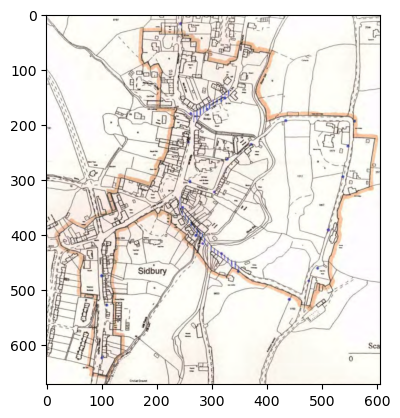

In [3]:
plt.imshow(img)

In [4]:
#convert the BGR image to HSV colour space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#set the lower and upper bounds for the green hue
#  OpenCV uses H: 0-179, S: 0-255, V: 0-255
#  Gimp   uses H: 0-360, S: 0-100, V: 0-100

#  So Gimp's values of 200,     62,        94 are ...
#                     (200/2), (.62*255), (.94*255)  

# Beer
#tolerance_percent = 17
#gimpH = 200
#gimpS = 62
#gimpV = 90

# Salcombe Regis
#tolerance_percent = 16
#gimpH = 190
#gimpS = 27
#gimpV = 95

# Salcombe Regis
#tolerance_percent = 14
#gimpH = 190
#gimpS = 28
#gimpV = 95

# Sidbury
tolerance_percent = 15
gimpH = 217
gimpS = 29 #29
gimpV = 97

tolerance_H = (tolerance_percent/100) * 360
tolerance_S = (tolerance_percent/100) * 255
tolerance_V = (tolerance_percent/100) * 255

cvH   = gimpH / 2
cvS   = (gimpS/100) * 255
cvV   = (gimpV/100) * 255

lower_green = np.array([cvH - tolerance_H, cvS - tolerance_S, cvV - tolerance_V])
upper_green = np.array([cvH + tolerance_H, cvS + tolerance_S, cvV + tolerance_V])

# Good for Beer
#lower_green = np.array([50,100,220])
#upper_green = np.array([120,220,255])

# Good for Salcombe Regis
#lower_green = np.array([90, 30, 200])
#upper_green = np.array([100, 70, 255]) 

#create a mask for green colour using inRange function
mask = cv.inRange(hsv, lower_green, upper_green)

#perform bitwise and on the original image arrays using the mask
res = cv.bitwise_and(img, img, mask=mask)

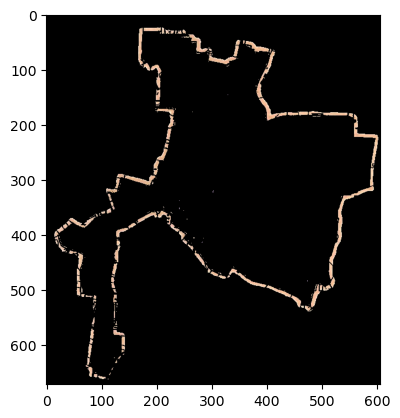

In [5]:
plt.imshow(res)

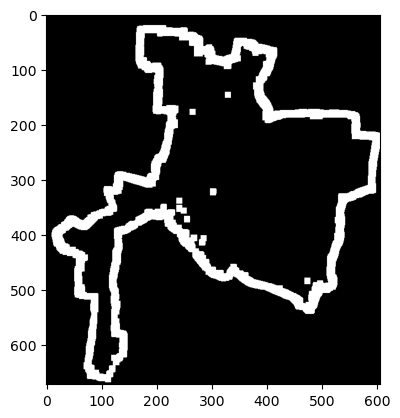

In [6]:
x = extract_edges(res)
plt.imshow(x)

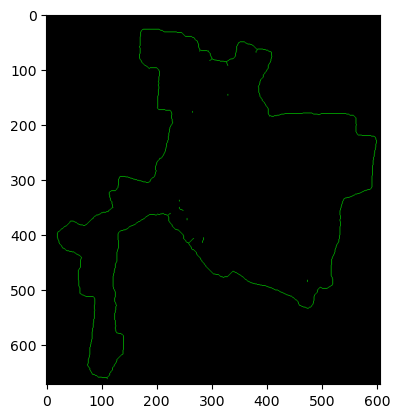

In [7]:
import skimage.morphology
import skimage.io
import skimage.util
#import matplotlib.pyplot as plt
#img = skimage.io.imread('shoes.png')
#image = skimage.util.invert(x)
#image = image >12
skel = skimage.morphology.skeletonize(x)

plt.imshow(skel)

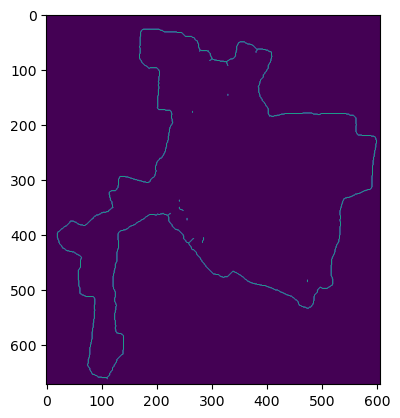

In [8]:
img_gray = cv.cvtColor(skel, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [9]:
cv.imwrite(DIR + "img_gray_thin.png", img_gray, [cv.IMWRITE_JPEG_QUALITY, 95])
print("Done")

Done


In [10]:
img_gray_neg = 255 - img_gray

In [11]:
cv.imwrite(DIR + "img_" + fileName, img_gray_neg, [cv.IMWRITE_JPEG_QUALITY, 95])
print("Done")

Done


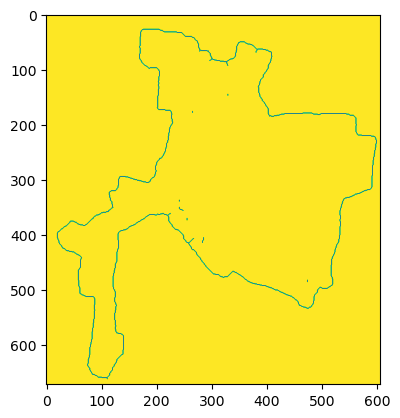

In [12]:
kernel = np.ones((1, 1), np.uint8)
img_gray_thicker = cv.dilate(img_gray_neg, kernel, iterations=8)
plt.imshow(img_gray_thicker)

In [13]:
img_gray_thicker_neg = 255 - img_gray_thicker
cv.imwrite(DIR + "_11_8_" + fileName, img_gray_thicker, [cv.IMWRITE_JPEG_QUALITY, 95])
print("Done")


Done


In [14]:
# kernel = cv.getStructuringElement(cv.MORPH_RECT, (1,1))
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1, 1))
dilate = cv.dilate(img_gray_thicker, kernel, iterations=4)

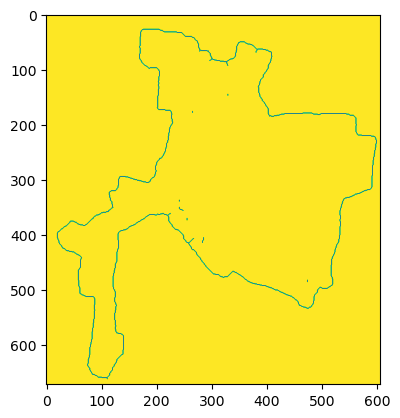

In [15]:
plt.imshow(dilate)

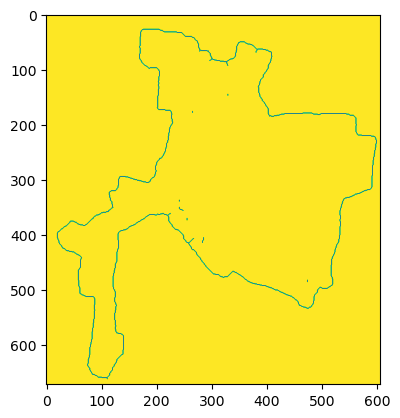

In [16]:
dilated = cv.dilate(dilate, np.ones((1, 1)) , iterations=40)
plt.imshow(dilated)

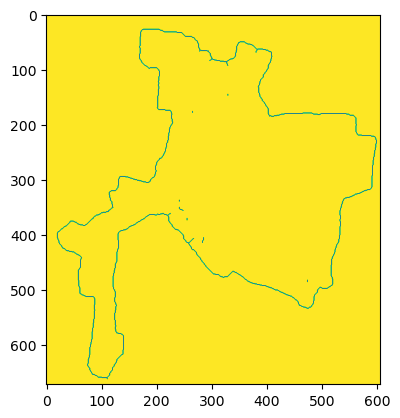

In [17]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (1,1))
_dilate = cv.dilate(img_gray_neg, kernel, iterations=4)
plt.imshow(_dilate)
